In [70]:
import keras
import keras.utils
import numpy as np
import matplotlib.pyplot as plt
import keras.utils
from keras.layers import *
from google_drive_downloader import GoogleDriveDownloader as gdd

In [71]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [72]:
x_train.shape

(60000, 28, 28)

In [73]:
x_test.shape

(10000, 28, 28)

In [74]:
type(x_train)

numpy.ndarray

In [75]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

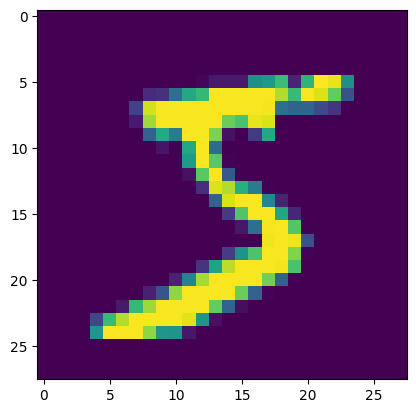

In [76]:
plt.imshow(x_train[0])

In [77]:
y_train[:15]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1], dtype=uint8)

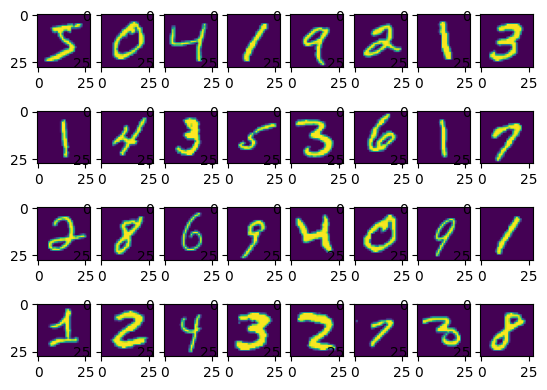

In [78]:
for i in range(32):
    plt.subplot(4,8,i+1)
    plt.imshow(x_train[i])
plt.show()

In [79]:
input_shape = (28, 28, 1)

In [80]:
model_1 = keras.Sequential([
      keras.Input(shape=input_shape),
      Flatten(),
      Dense(50),
      Dense(1)
      ] )

In [81]:
model_1.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

Обучение модели на не нормализованных данных бесполезно

In [82]:
%%time

history = model_1.fit(x_train, y_train, batch_size=32, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 5.3095e-07 - accuracy: 0.1546
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 5.3095e-07 - accuracy: 0.1546
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 5.3095e-07 - accuracy: 0.1546
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 5.3095e-07 - accuracy: 0.1546
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 5.3095e-07 - accuracy: 0.1546
CPU times: user 27.2 s, sys: 1.33 s, total: 28.5 s
Wall time: 41.6 s


Нормализация обучающего и тестового набора

In [83]:
x_train = x_train / 255
x_test = x_test / 255

In [84]:
y_train_cat = keras.utils.to_categorical(y_train, 10)
y_test_cat = keras.utils.to_categorical(y_test, 10)

In [85]:
model_2 = keras.Sequential([
      keras.Input(shape=input_shape),
      Flatten(),
      Dense(50, activation = 'relu'),
      Dense(10, activation = 'softmax')
      ] )

In [140]:
model_2.compile(optimizer='SGD',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [87]:
x_train_all = np.concatenate([x_train, x_test])
y_train_cat_all = np.concatenate([y_train_cat, y_test_cat])

In [149]:
%%time

history = model_2.fit(x_train_all, y_train_cat_all, batch_size=8, epochs=5, validation_data =(x_test, y_test_cat) )

Epoch 1/5
8750/8750 [==============================] - 20s 2ms/step - loss: 0.0617 - accuracy: 0.9822 - val_loss: 0.0475 - val_accuracy: 0.9867
Epoch 2/5
8750/8750 [==============================] - 19s 2ms/step - loss: 0.0588 - accuracy: 0.9826 - val_loss: 0.0507 - val_accuracy: 0.9847
Epoch 3/5
8750/8750 [==============================] - 18s 2ms/step - loss: 0.0556 - accuracy: 0.9841 - val_loss: 0.0459 - val_accuracy: 0.9868
Epoch 4/5
8750/8750 [==============================] - 19s 2ms/step - loss: 0.0530 - accuracy: 0.9846 - val_loss: 0.0437 - val_accuracy: 0.9874
Epoch 5/5
8750/8750 [==============================] - 19s 2ms/step - loss: 0.0504 - accuracy: 0.9854 - val_loss: 0.0384 - val_accuracy: 0.9902
CPU times: user 1min 42s, sys: 5.78 s, total: 1min 47s
Wall time: 1min 36s


313/313 [==============================] - 1s 2ms/step - loss: 0.0478 - accuracy: 0.9876


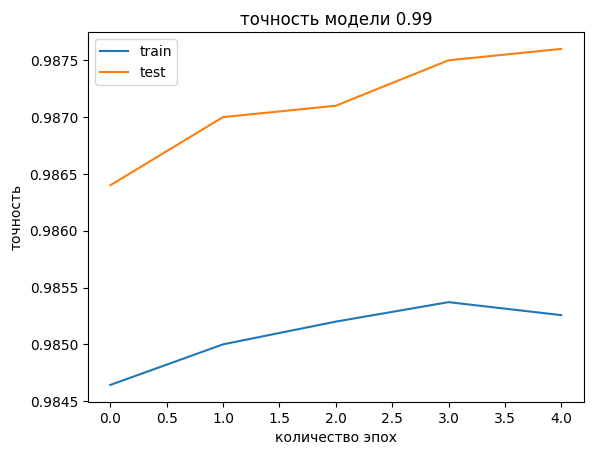

In [146]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title(f"точность модели {round(model_2.evaluate(x_test, y_test_cat)[1], 2)}")
plt.ylabel('точность')
plt.xlabel('количество эпох')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


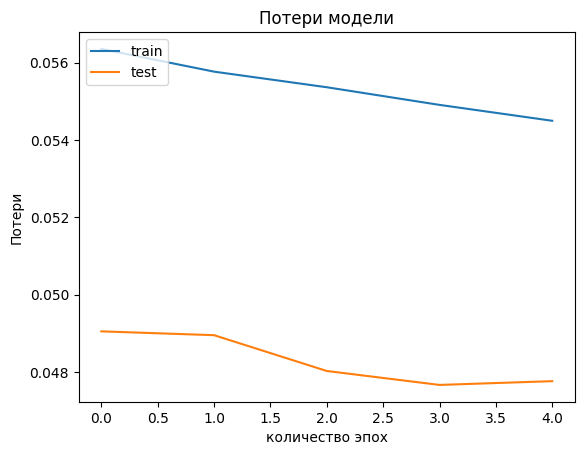

In [147]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Потери модели')
plt.ylabel('Потери')
plt.xlabel('количество эпох')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

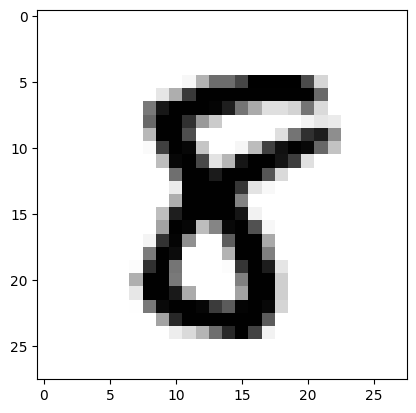

1/1 [==============================] - 0s 85ms/step
Цифра: 8


In [137]:
index = 9402

plt.imshow(x_test[index].reshape(28, 28), cmap=plt.cm.binary)
plt.show()

x = x_test[index]
x = np.expand_dims(x, axis=0)

prediction = model_2.predict(x)
prediction = np.argmax(prediction[0])

print("Цифра:", prediction)

In [92]:
gdd.download_file_from_google_drive(file_id="16dXFPQ7XzN0YhvDB8b68IdVPKIUdBL-q",
                                    dest_path="./sample_data/Eight1.bmp",
                                    unzip=False)

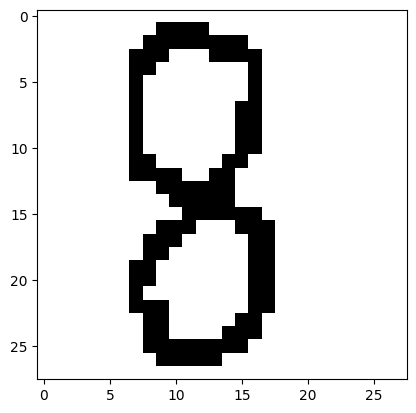

1/1 [==============================] - 0s 20ms/step
цифра: 8


In [148]:
from PIL import Image

img = Image.open("./sample_data/Eight.bmp")

img = img.resize((28,28))
img = img.convert('L')
img = np.array(img)

plt.imshow(img, cmap=plt.cm.binary)
plt.show()

img = img.reshape(1,28,28)
img = img / 255

prediction = model_2.predict(img)
prediction = np.argmax(prediction[0])

print("цифра:", prediction)